# Exploration and Cleaning

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
    

In [2]:
# Read the datasets

df_weather = pd.read_csv(
    '../Data/weather_features.csv', 
    parse_dates=['dt_iso']
)

df_energy = pd.read_csv(
    '../Data/energy_dataset.csv', 
    parse_dates=['time']
)

df_energy.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


# Energy Dataset

In [3]:
###drop all the columns that are constituted by zeroes and NaNs, 
# as they are unusable. We will also remove the columns which will 
# not be used at all in our analysis and which contain day-ahead forecasts 
# for the total load, the solar energy and the wind energy.

# Drop unusable columns
if('generation fossil coal-derived gas' in df_energy.columns.values):
    df_energy = df_energy.drop(columns=['generation fossil coal-derived gas','generation fossil oil shale', 
                            'generation fossil peat', 'generation geothermal', 
                            'generation hydro pumped storage aggregated', 'generation marine', 
                            'generation wind offshore', 'forecast wind offshore eday ahead',
                            'total load forecast', 'forecast solar day ahead',
                            'forecast wind onshore day ahead'])
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [4]:
# Convert time to datetime object and set it as index
df_energy['time'] = pd.to_datetime(df_energy['time'], utc=True)
df_energy = df_energy.set_index('time')

In [5]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in df_energy.'
      .format(df_energy.isnull().values.sum()))

temp_energy = df_energy.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_energy based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in df_energy.
There are 0 duplicate rows in df_energy based on all columns.


In [6]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\fe-na\AppData\Local\Temp\ipykernel_20956\1224047559.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


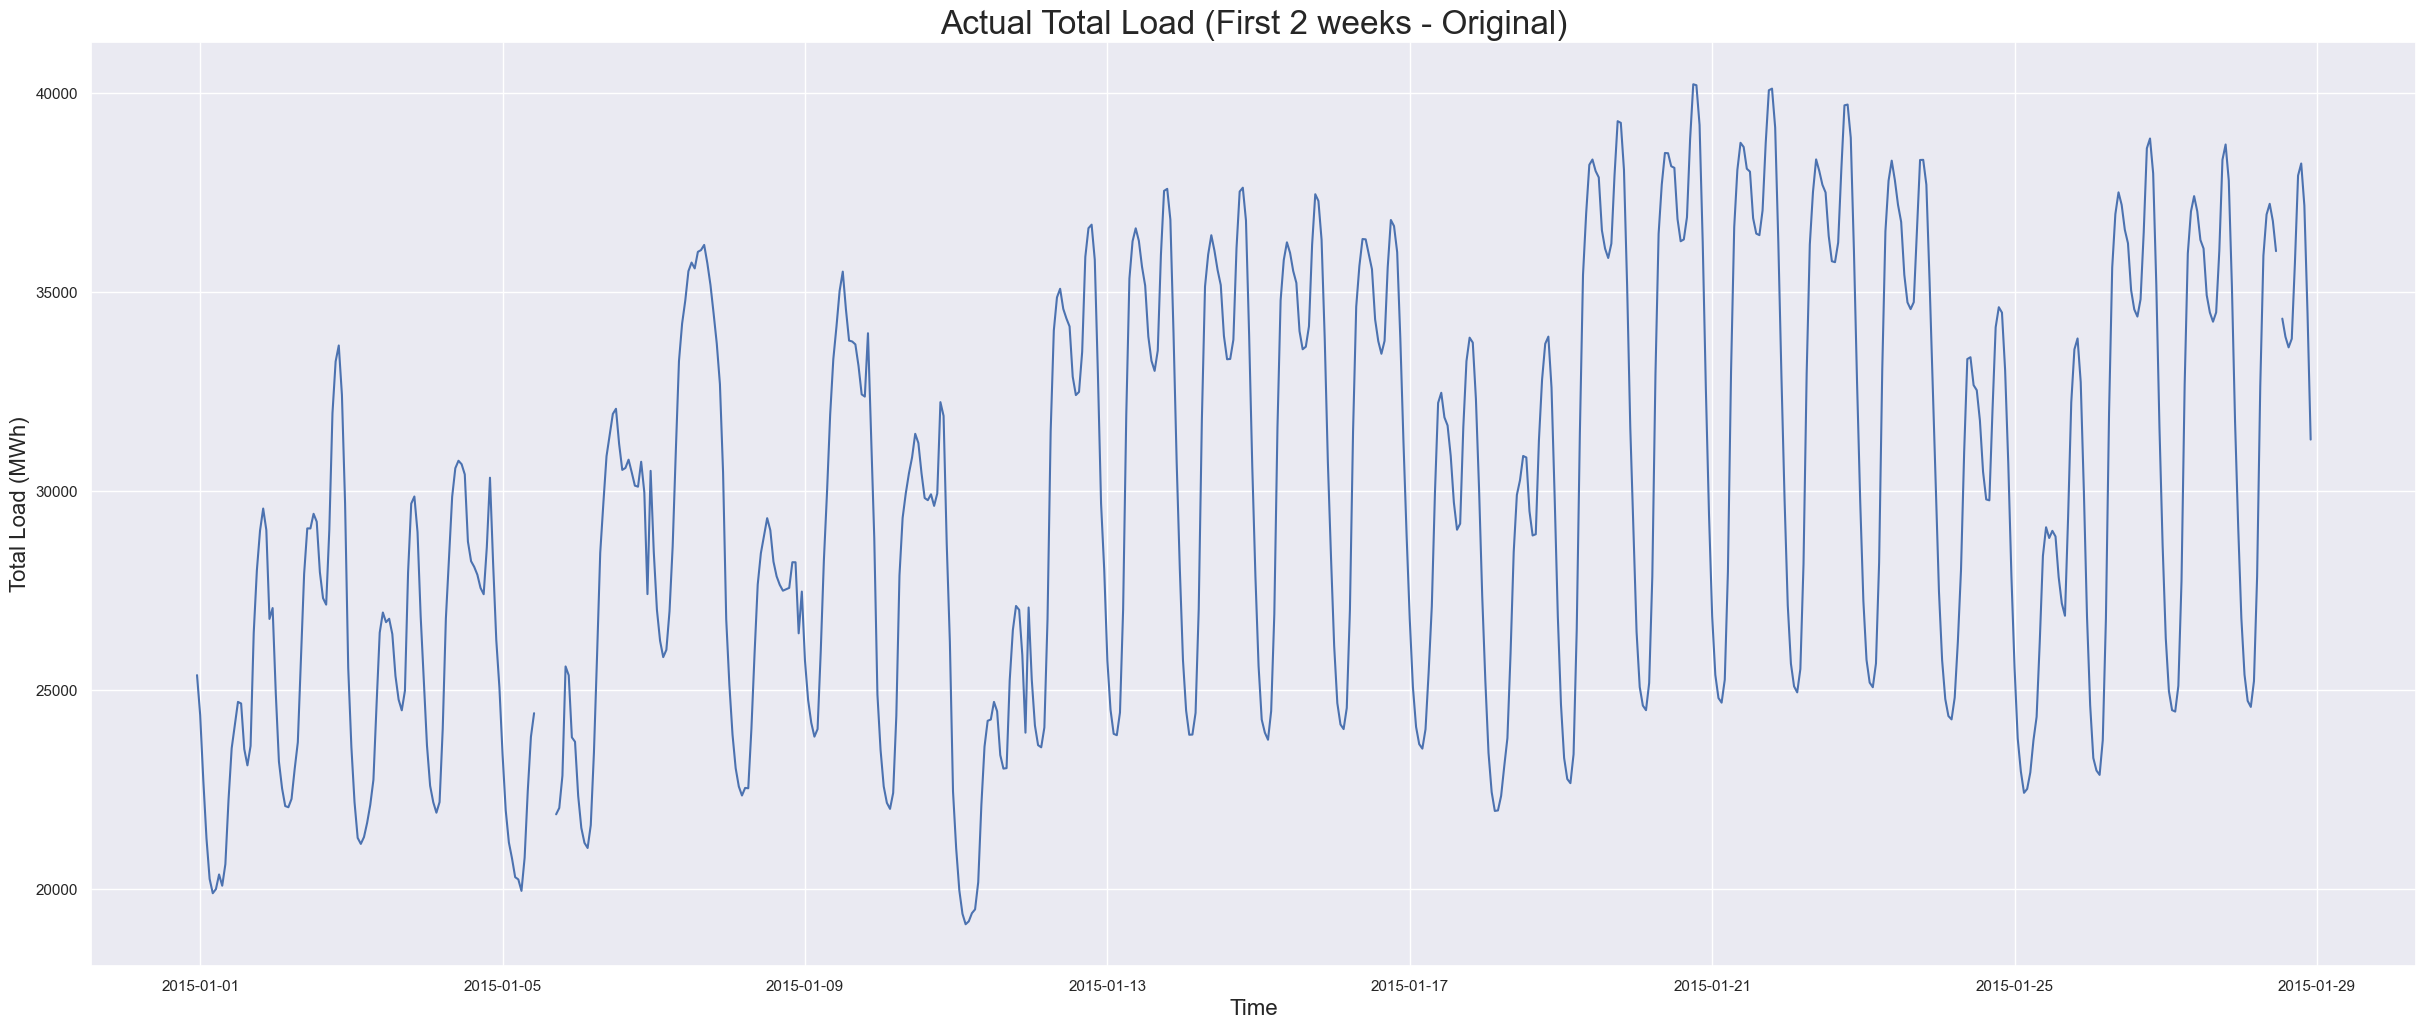

In [7]:
# Zoom into the plot of the hourly (actual) total load for 4 weeks

# Visible, that there are null values for few hours...

ax = plot_series(df=df_energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*4)
plt.show()

In [8]:
# Display the rows with null values

df_energy[df_energy.isnull().any(axis=1)].tail()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,
2016-11-23 03:00:00+00:00,NaN,900.0,4838.0,4547.0,269.0,1413.0,795.0,435.0,5040.0,60.0,85.0,15.0,227.0,4598.0,23112.0,43.19,49.11
2017-11-14 11:00:00+00:00,0.0,0.0,10064.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,60.53,66.17
2017-11-14 18:00:00+00:00,0.0,0.0,12336.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,68.05,75.45
2018-06-11 16:00:00+00:00,331.0,506.0,7538.0,5360.0,300.0,1.0,1134.0,4258.0,5856.0,52.0,96.0,170.0,269.0,9165.0,NaN,69.87,64.93
2018-07-11 07:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.01,69.79


In [9]:
df_energy.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

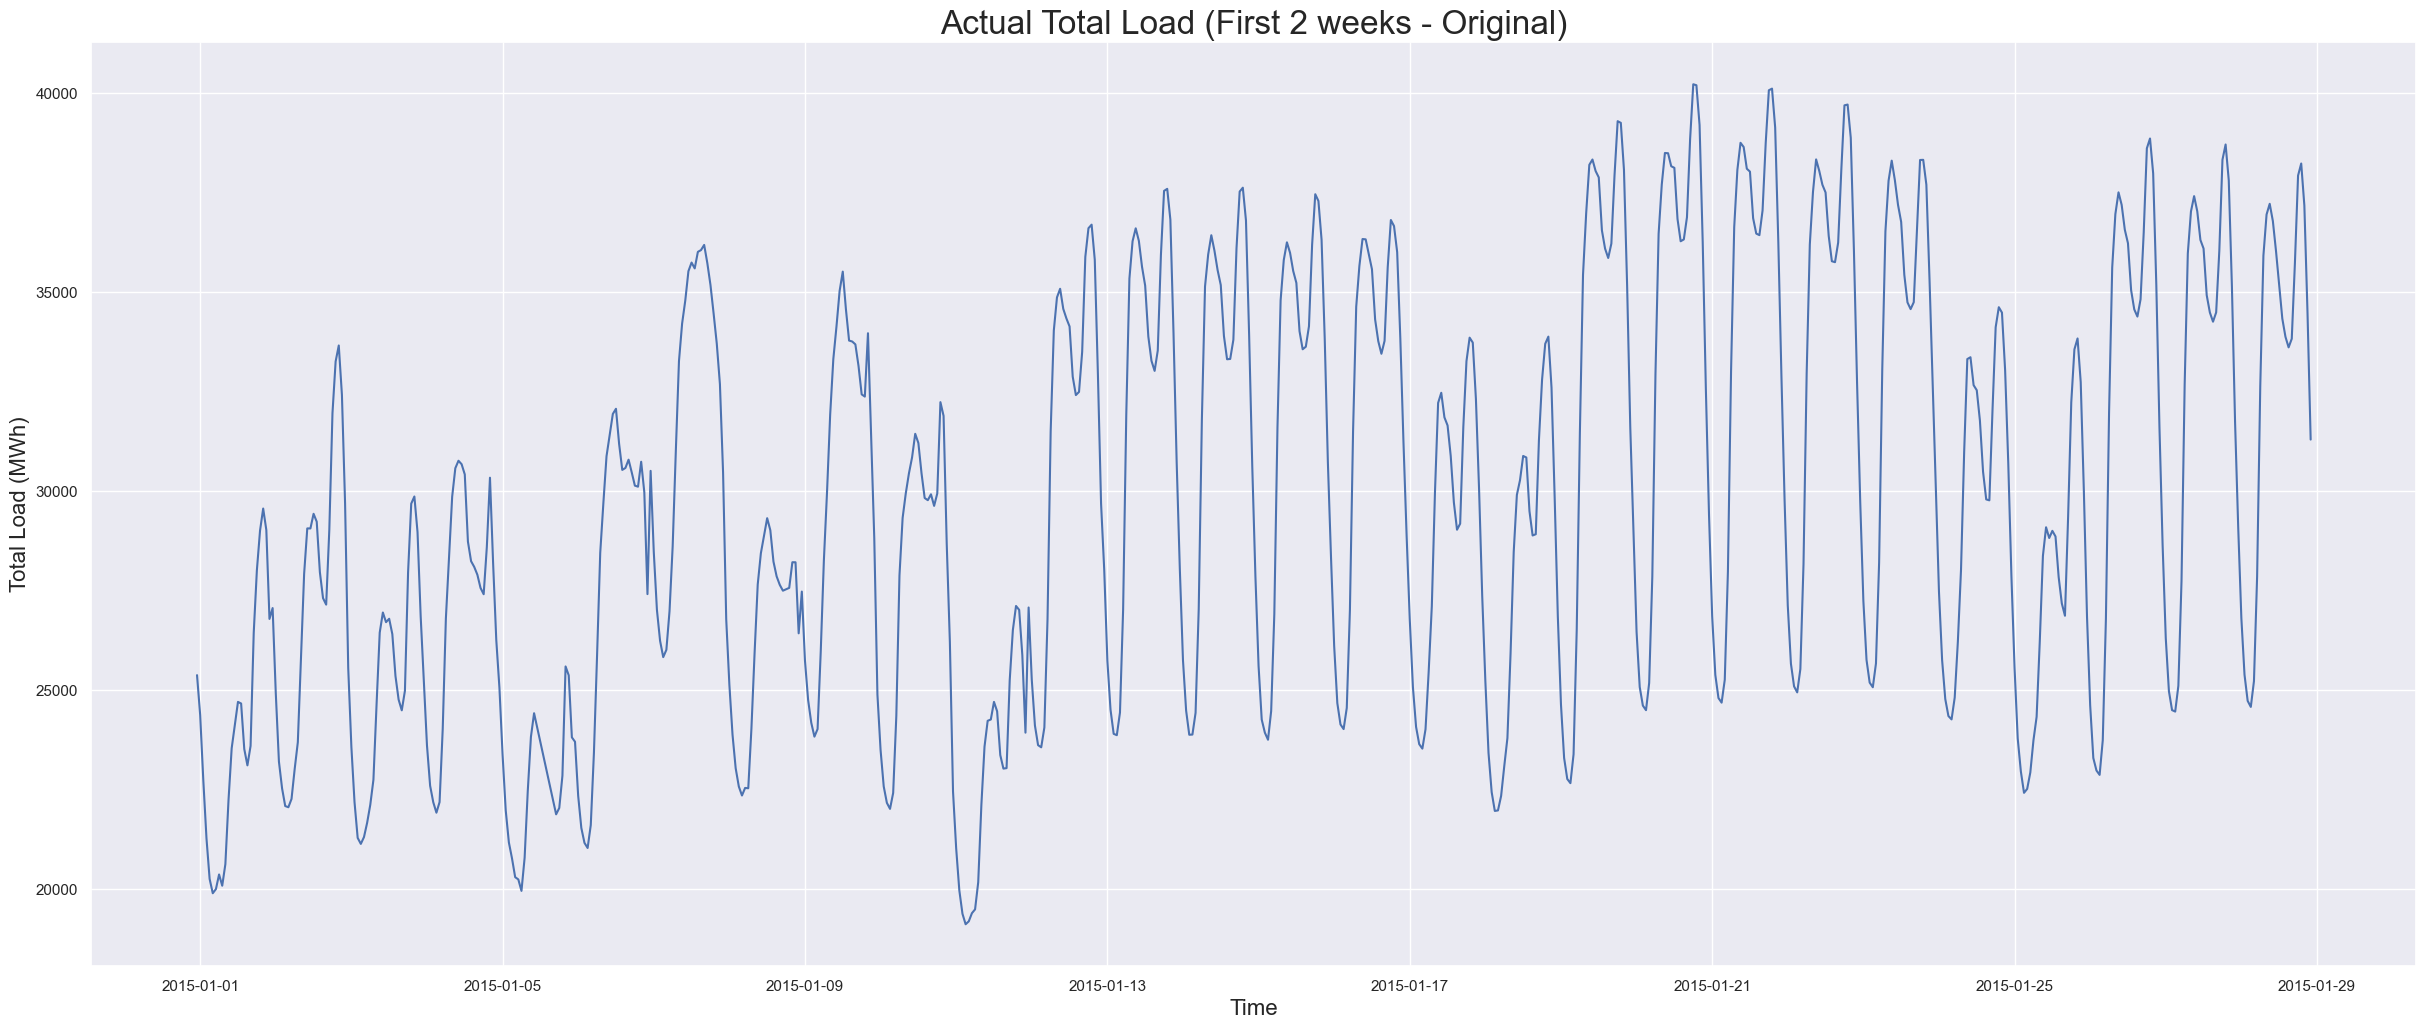

In [10]:
# Zoom into the plot of the hourly (actual) total load for 4 weeks

# Visible, that there are null values for few hours...

ax = plot_series(df=df_energy, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*4)
plt.show()

# Weather Dataset

In [11]:
df_weather.head()

,dt_iso,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2015-01-01 00:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
1,2015-01-01 01:00:00+01:00,Valencia,270.475,270.475,270.475,1001,77,1,62,0.0,0.0,0.0,0,800,clear,sky is clear,01n
2,2015-01-01 02:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
3,2015-01-01 03:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n
4,2015-01-01 04:00:00+01:00,Valencia,269.686,269.686,269.686,1002,78,0,23,0.0,0.0,0.0,0,800,clear,sky is clear,01n


In [12]:
df_weather.describe().round(2)

,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id
count,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00,178396.00
mean,289.62,288.33,291.09,1069.26,68.42,2.47,166.59,0.08,0.00,0.00,25.07,759.83
std,8.03,7.96,8.61,5969.63,21.90,2.10,116.61,0.40,0.01,0.22,30.77,108.73
min,262.24,262.24,262.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,200.00
25%,283.67,282.48,284.65,1013.00,53.00,1.00,55.00,0.00,0.00,0.00,0.00,800.00
50%,289.15,288.15,290.15,1018.00,72.00,2.00,177.00,0.00,0.00,0.00,20.00,800.00
75%,295.15,293.73,297.15,1022.00,87.00,4.00,270.00,0.00,0.00,0.00,40.00,801.00
max,315.60,315.15,321.15,1008371.00,100.00,133.00,360.00,12.00,2.32,21.50,100.00,804.00


In [13]:
df_weather.columns

Index(['dt_iso', 'city_name', 'temp', 'temp_min', 'temp_max', 'pressure',
       'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
       'clouds_all', 'weather_id', 'weather_main', 'weather_description',
       'weather_icon'],
      dtype='object')

In [14]:
# Print the type of each variable in df_weather

df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178396 entries, 0 to 178395
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_iso               178396 non-null  object 
 1   city_name            178396 non-null  object 
 2   temp                 178396 non-null  float64
 3   temp_min             178396 non-null  float64
 4   temp_max             178396 non-null  float64
 5   pressure             178396 non-null  int64  
 6   humidity             178396 non-null  int64  
 7   wind_speed           178396 non-null  int64  
 8   wind_deg             178396 non-null  int64  
 9   rain_1h              178396 non-null  float64
 10  rain_3h              178396 non-null  float64
 11  snow_3h              178396 non-null  float64
 12  clouds_all           178396 non-null  int64  
 13  weather_id           178396 non-null  int64  
 14  weather_main         178396 non-null  object 
 15  weather_descripti

In [15]:
# Convert types (int to float, time into proper time format)
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [16]:
df_weather = df_convert_dtypes(df_weather, np.int64, np.float64)

In [17]:
# Convert dt_iso to datetime type, rename it and set it as index

df_weather['time'] = pd.to_datetime(df_weather['dt_iso'], utc=True, infer_datetime_format=True)
df_weather = df_weather.drop(['dt_iso'], axis=1)
df_weather = df_weather.set_index('time')

In [18]:
df_weather.head()

,city_name,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
time,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 00:00:00+00:00,Valencia,270.475,270.475,270.475,1001.0,77.0,1.0,62.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 01:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 02:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n
2015-01-01 03:00:00+00:00,Valencia,269.686,269.686,269.686,1002.0,78.0,0.0,23.0,0.0,0.0,0.0,0.0,800.0,clear,sky is clear,01n


In [19]:
# Split Dataset into Datasets for each City

# Display average weather features grouped by each city

# mean_weather_by_city = df_weather.groupby('city_name').mean()
# mean_weather_by_city

In [20]:
# Find NaNs and duplicates in df_weather

print('There are {} missing values or NaNs in df_weather.'
      .format(df_weather.isnull().values.sum()))

temp_weather = df_weather.duplicated(keep='first').sum()

print('There are {} duplicate rows in df_weather based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in df_weather.
There are 8622 duplicate rows in df_weather based on all columns.


In [21]:
# Create df_weather_2 and drop duplicate rows in df_weather

df_weather_2 = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'], 
                                                        keep='last').set_index('time')

df_weather = df_weather.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [22]:
# Display all the unique values in the column 'weather_description'

weather_description_unique = df_weather['weather_description'].unique()
weather_description_unique

array(['sky is clear', 'few clouds', 'scattered clouds', 'broken clouds',
       'overcast clouds', 'light rain', 'moderate rain',
       'heavy intensity rain', 'mist', 'heavy intensity shower rain',
       'shower rain', 'very heavy rain', 'thunderstorm with heavy rain',
       'thunderstorm with light rain', 'proximity thunderstorm',
       'thunderstorm', 'light intensity shower rain',
       'light intensity drizzle', 'thunderstorm with rain', 'fog',
       'smoke', 'drizzle', 'heavy intensity drizzle', 'haze',
       'proximity shower rain', 'light snow', 'rain and snow',
       'light rain and snow', 'snow', 'sleet', 'rain and drizzle',
       'light intensity drizzle rain', 'light shower snow',
       'proximity moderate rain', 'ragged shower rain', 'heavy snow',
       'sand dust whirls', 'proximity drizzle', 'dust',
       'light thunderstorm', 'squalls'], dtype=object)

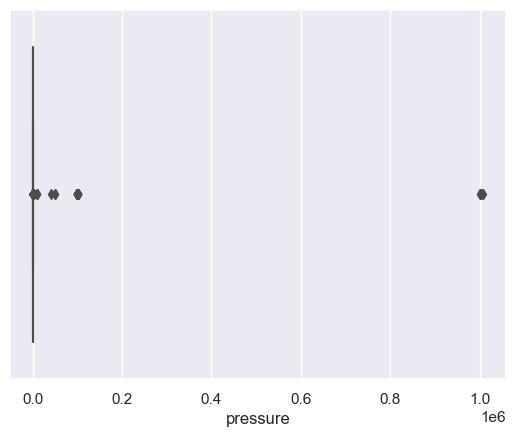

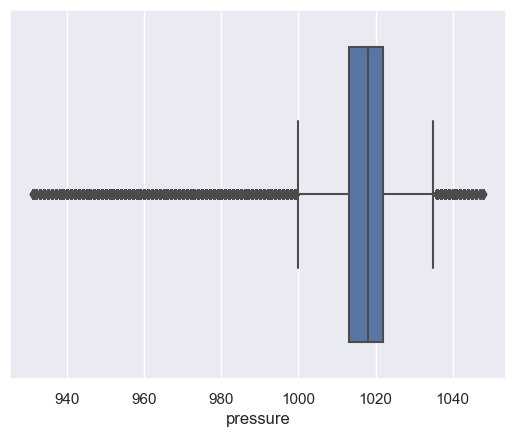

In [23]:
# Check for outliers in 'pressure' column and filter them out

sns.boxplot(x=df_weather['pressure'])
plt.show()
# Replace outliers in 'pressure' with NaNs

df_weather.loc[df_weather.pressure > 1051, 'pressure'] = np.nan
df_weather.loc[df_weather.pressure < 931, 'pressure'] = np.nan

sns.boxplot(x=df_weather['pressure'])
plt.show()

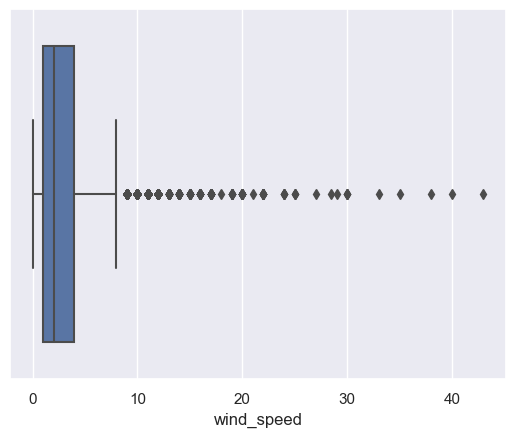

In [24]:
df_weather.loc[df_weather.wind_speed > 50, 'wind_speed'] = np.nan
df_weather.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

sns.boxplot(x=df_weather['wind_speed'])
plt.show()

In [25]:
b = list(set(df_weather["city_name"]))
#(b[0])
combineCities = df_weather[df_weather["city_name"]==b[0]]
combineCities = combineCities.drop(columns=["city_name","rain_3h","snow_3h","weather_icon","weather_description","weather_main","clouds_all","wind_deg","temp_min","temp_max","rain_1h"])
combineCities.set_axis([f'temp_{b[0]}', f'pressure_{b[0]}', f'humidity_{b[0]}', f'wind_speed_{b[0]}', f'weather_id_{b[0]}'], axis=1, inplace=True)
b.remove(b[0])
for c in b: 
    print(c)
    citytable = df_weather[df_weather["city_name"]==c]
    citytable = citytable.drop(columns=["city_name","rain_3h","snow_3h","weather_icon","weather_description","weather_main","clouds_all","wind_deg","temp_min","temp_max","rain_1h"])
    citytable.set_axis([f'temp_{c}', f'pressure_{c}', f'humidity_{c}', f'wind_speed_{c}', f'weather_id_{c}'], axis=1, inplace=True)
    combineCities = pd.concat([combineCities,citytable],axis=1)
print(len(combineCities))
print(combineCities.columns)
df_weather = combineCities

 Barcelona
Valencia
Bilbao
Madrid
35064
Index(['temp_Seville', 'pressure_Seville', 'humidity_Seville',
       'wind_speed_Seville', 'weather_id_Seville', 'temp_ Barcelona',
       'pressure_ Barcelona', 'humidity_ Barcelona', 'wind_speed_ Barcelona',
       'weather_id_ Barcelona', 'temp_Valencia', 'pressure_Valencia',
       'humidity_Valencia', 'wind_speed_Valencia', 'weather_id_Valencia',
       'temp_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'weather_id_Bilbao', 'temp_Madrid',
       'pressure_Madrid', 'humidity_Madrid', 'wind_speed_Madrid',
       'weather_id_Madrid'],
      dtype='object')


C:\Users\fe-na\AppData\Local\Temp\ipykernel_20956\555996367.py:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  combineCities.set_axis([f'temp_{b[0]}', f'pressure_{b[0]}', f'humidity_{b[0]}', f'wind_speed_{b[0]}', f'weather_id_{b[0]}'], axis=1, inplace=True)
C:\Users\fe-na\AppData\Local\Temp\ipykernel_20956\555996367.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  citytable.set_axis([f'temp_{c}', f'pressure_{c}', f'humidity_{c}', f'wind_speed_{c}', f'weather_id_{c}'], axis=1, inplace=True)
C:\Users\fe-na\AppData\Local\Temp\ipykernel_20956\555996367.py:11: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  citytable.set_axis([f'temp_{c}', f'pressure_{c}'

# Merging Datasets

In [26]:
print(df_energy.columns)

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual'],
      dtype='object')


In [27]:
df_energy = df_energy.drop(['price actual','price day ahead','generation waste','generation hydro pumped storage consumption','generation hydro water reservoir','generation hydro run-of-river and poundage','generation biomass','generation fossil brown coal/lignite','generation fossil gas','generation fossil hard coal','generation fossil oil','generation nuclear','generation other','generation other renewable','total load actual'], axis=1)

In [28]:
# Prepare Dataset:
#df_weather = df_weather[df_weather["city_name"]=="Bilbao" or df_weather["city_name"]=="Valencia"]


In [29]:
print(df_weather.columns)

Index(['temp_Seville', 'pressure_Seville', 'humidity_Seville',
       'wind_speed_Seville', 'weather_id_Seville', 'temp_ Barcelona',
       'pressure_ Barcelona', 'humidity_ Barcelona', 'wind_speed_ Barcelona',
       'weather_id_ Barcelona', 'temp_Valencia', 'pressure_Valencia',
       'humidity_Valencia', 'wind_speed_Valencia', 'weather_id_Valencia',
       'temp_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'weather_id_Bilbao', 'temp_Madrid',
       'pressure_Madrid', 'humidity_Madrid', 'wind_speed_Madrid',
       'weather_id_Madrid'],
      dtype='object')


In [30]:
df_weather.head()

,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,weather_id_Seville,temp_ Barcelona,pressure_ Barcelona,humidity_ Barcelona,wind_speed_ Barcelona,weather_id_ Barcelona,...,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,weather_id_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,weather_id_Madrid
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,7.0,800.0,...,269.657312,1036.0,97.0,0.0,800.0,267.325,971.0,63.0,1.0,800.0
2015-01-01 00:00:00+00:00,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,7.0,800.0,...,269.763500,1035.0,97.0,0.0,800.0,267.325,971.0,63.0,1.0,800.0
2015-01-01 01:00:00+00:00,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,7.0,800.0,...,269.251688,1036.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0
2015-01-01 02:00:00+00:00,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,7.0,800.0,...,269.203344,1035.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0
2015-01-01 03:00:00+00:00,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,7.0,800.0,...,269.485500,1035.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0


In [31]:
# Input Wheather Data and output is the produced energy (between 0 and 100)

mergedBase = pd.merge(df_energy, df_weather, on="time")
mergedBase.head()

,generation solar,generation wind onshore,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,weather_id_Seville,temp_ Barcelona,pressure_ Barcelona,humidity_ Barcelona,...,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,weather_id_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,weather_id_Madrid
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,49.0,6378.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,269.657312,1036.0,97.0,0.0,800.0,267.325,971.0,63.0,1.0,800.0
2015-01-01 00:00:00+00:00,50.0,5890.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,269.763500,1035.0,97.0,0.0,800.0,267.325,971.0,63.0,1.0,800.0
2015-01-01 01:00:00+00:00,50.0,5461.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,269.251688,1036.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0
2015-01-01 02:00:00+00:00,50.0,5238.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,269.203344,1035.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0
2015-01-01 03:00:00+00:00,42.0,4935.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,269.485500,1035.0,97.0,1.0,800.0,266.186,971.0,64.0,1.0,800.0


In [32]:
# Generate 'hour', 'weekday' and 'month' features

for i in range(len(mergedBase)):
    position = mergedBase.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    day =position.day
    mergedBase.loc[position, 'hour'] = hour
    mergedBase.loc[position, 'weekday'] = weekday
    mergedBase.loc[position, 'month'] = month
    mergedBase.loc[position, 'day'] = day


A very useful feature that we will generate, has to do with the business hours, i.e. whether businesses are open or not in a given hour. However, there is a certain peculiarity in Spain as the 9AM-5PM working day is not generally followed by all types of businesses, due to a lunch break (known as "siesta") in between. The most usual business hours are from Monday-Saturday, from 9:30AM-1:30PM and then again from 4:30PM-8PM.

Therefore, the value of the 'business hour' will be equal to '2' if the given hour is within the business hours, equal to '1' if the given hour is within the "siesta" in between and equal to '0' for all other given hours.

In [33]:
# # Generate 'business hour' feature

for i in range(len(mergedBase)):
    position = mergedBase.index[i]
    hour = position.hour
    if ((hour > 8 and hour < 14) or (hour > 16 and hour < 21)):
        mergedBase.loc[position, 'business hour'] = 2
    elif (hour >= 14 and hour <= 16):
        mergedBase.loc[position, 'business hour'] = 1
    else:
        mergedBase.loc[position, 'business hour'] = 0

# Generate 'weekend' feature

# for i in range(len(mergedBase)):
#     position = mergedBase.index[i]
#     weekday = position.weekday()
#     if (weekday == 6):
#         mergedBase.loc[position, 'weekday'] = 2
#     elif (weekday == 5):
#         mergedBase.loc[position, 'weekday'] = 1
#     else:
#         mergedBase.loc[position, 'weekday'] = 0


In [34]:
# def multivariate_data(dataset, target, start_index, end_index, history_size,
#                       target_size, step, single_step=False):
#     data = []
#     labels = []

#     start_index = start_index + history_size
#     if end_index is None:
#         end_index = len(dataset) - target_size
        
#     for i in range(start_index, end_index):
#         indices = range(i-history_size, i, step)
#         data.append(dataset[indices])
        
#         if single_step:
#             labels.append(target[i + target_size])
#         else:
#             labels.append(target[i : i + target_size])

#     return np.array(data), np.array(labels)
# train_end_idx = 27048
# cv_end_idx = 31056
# test_end_idx = 35064

In [35]:
mergedBase.head()

,generation solar,generation wind onshore,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,weather_id_Seville,temp_ Barcelona,pressure_ Barcelona,humidity_ Barcelona,...,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,weather_id_Madrid,hour,weekday,month,day,business hour
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,49.0,6378.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,267.325,971.0,63.0,1.0,800.0,23.0,2.0,12.0,31.0,0.0
2015-01-01 00:00:00+00:00,50.0,5890.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,267.325,971.0,63.0,1.0,800.0,0.0,3.0,1.0,1.0,0.0
2015-01-01 01:00:00+00:00,50.0,5461.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,1.0,3.0,1.0,1.0,0.0
2015-01-01 02:00:00+00:00,50.0,5238.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,2.0,3.0,1.0,1.0,0.0
2015-01-01 03:00:00+00:00,42.0,4935.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,3.0,3.0,1.0,1.0,0.0


In [36]:
# # Features: Year, Month, Day, Hour
# dates = mergedBase.index.values
# dateArr = pd.arrays.DatetimeArray(dates)
# year = dateArr.year
# month = dateArr.month
# day = dateArr.day
# hour = dateArr.hour
# df = pd.DataFrame(data={"time":dateArr,"year":year,"month":month,"day":day,"hour":hour})
# df["time"] = pd.to_datetime(df['time'], utc = True)
# df.set_index("time", inplace = True)
# # mergedBase.index = pd.to_datetime(df.index)
# # mergedBase.index = mergedBase.index.tz_localize(None)
# df.head()

In [37]:
#print(df.head())

In [38]:
# print(len(df))
# print(len(mergedBase))
# df_final = pd.merge(df, mergedBase, on="time")
# df_final

In [39]:
# #save to  file
# df_final = df_final.drop(columns=["hour_y","month_y","weekday","business hour"])
# df_final.rename(columns = {'month_x':'month', 'hour_x':'hour'}, inplace = True)
# #df_final.to_csv("../Data/df_weather_and_green_energy.csv")


In [40]:
#print(df_final.head())


In [41]:
# single_date_final = df_final.groupby("time").mean().reset_index()
mergedBase.head()

,generation solar,generation wind onshore,temp_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,weather_id_Seville,temp_ Barcelona,pressure_ Barcelona,humidity_ Barcelona,...,temp_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,weather_id_Madrid,hour,weekday,month,day,business hour
time,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,49.0,6378.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,267.325,971.0,63.0,1.0,800.0,23.0,2.0,12.0,31.0,0.0
2015-01-01 00:00:00+00:00,50.0,5890.0,273.375,1039.0,75.0,1.0,800.0,281.625,1035.0,100.0,...,267.325,971.0,63.0,1.0,800.0,0.0,3.0,1.0,1.0,0.0
2015-01-01 01:00:00+00:00,50.0,5461.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,1.0,3.0,1.0,1.0,0.0
2015-01-01 02:00:00+00:00,50.0,5238.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,2.0,3.0,1.0,1.0,0.0
2015-01-01 03:00:00+00:00,42.0,4935.0,274.086,1039.0,71.0,3.0,800.0,281.286,1036.0,100.0,...,266.186,971.0,64.0,1.0,800.0,3.0,3.0,1.0,1.0,0.0


In [42]:
#single_date_final = single_date_final.drop(["year"],axis=1)
mergedBase.to_csv("../Data/mergedCitiesDatabase.csv")


In [43]:
print(len(mergedBase.columns))
print(mergedBase.columns)

32
Index(['generation solar', 'generation wind onshore', 'temp_Seville',
       'pressure_Seville', 'humidity_Seville', 'wind_speed_Seville',
       'weather_id_Seville', 'temp_ Barcelona', 'pressure_ Barcelona',
       'humidity_ Barcelona', 'wind_speed_ Barcelona', 'weather_id_ Barcelona',
       'temp_Valencia', 'pressure_Valencia', 'humidity_Valencia',
       'wind_speed_Valencia', 'weather_id_Valencia', 'temp_Bilbao',
       'pressure_Bilbao', 'humidity_Bilbao', 'wind_speed_Bilbao',
       'weather_id_Bilbao', 'temp_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'weather_id_Madrid', 'hour',
       'weekday', 'month', 'day', 'business hour'],
      dtype='object')


In [44]:
train_end = "2017-12-31 23:00:00"
test_start = "2018-01-01 00:00:00"

#standardize
for c in mergedBase.columns:
    if(c == "hour" or c =="weekday" or c == "month" or c == "day" or c=="business hour"):
        continue
    min_train = mergedBase[c].min()
    max_tain = mergedBase[c].max()

    mergedBase[c] = (mergedBase[c] - min_train) / (max_tain-min_train)
    print(c, min_train,max_tain)


df_train = mergedBase.loc[:train_end].copy()
df_test = mergedBase.loc[test_start:].copy()


df_train.to_csv("../Data/Training_Set.csv")
df_test.to_csv("../Data/Testing_Set.csv")


print("Test set fraction:", len(df_test) / len(mergedBase))

generation solar 0.0 5792.0
generation wind onshore 0.0 17436.0
temp_Seville 271.05 315.6
pressure_Seville 986.0 1048.0
humidity_Seville 7.0 100.0
wind_speed_Seville 0.0 15.0
weather_id_Seville 200.0 804.0
temp_ Barcelona 262.24 309.15
pressure_ Barcelona 932.0 1039.0
humidity_ Barcelona 0.0 100.0
wind_speed_ Barcelona 0.0 15.0
weather_id_ Barcelona 200.0 804.0
temp_Valencia 268.83065625 311.15
pressure_Valencia 969.0 1042.0
humidity_Valencia 8.0 100.0
wind_speed_Valencia 0.0 43.0
weather_id_Valencia 200.0 804.0
temp_Bilbao 266.85 312.47
pressure_Bilbao 961.0 1042.0
humidity_Bilbao 11.0 100.0
wind_speed_Bilbao 0.0 15.0
weather_id_Bilbao 200.0 804.0
temp_Madrid 264.132 313.33
pressure_Madrid 931.0 1042.0
humidity_Madrid 0.0 100.0
wind_speed_Madrid 0.0 18.0
weather_id_Madrid 200.0 804.0
Test set fraction: 0.2498003650467716


In [45]:
X = mergedBase[mergedBase.columns.drop(['generation solar','generation wind onshore'])]
# def minmax(arr):
#     min =arr.min()
#     max =arr.max()
#     return ((arr-min)/(max-min))


# y_solar = minmax(mergedBase['generation solar'].values)
# y_wind = minmax(mergedBase['generation wind onshore'].values)